Loaded model from disk


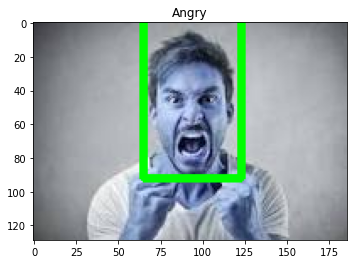

In [1]:
#Run prediction on sample images:
import cv2
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("emotion_model.h5")
print("Loaded model from disk")

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

face_detector = cv2.CascadeClassifier('HaarCascades/haarcascade_frontalface_default.xml')

img=cv2.imread("Test_images/1.jpg")
gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces available on camera
num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
for (x, y, w, h) in num_faces:
    cv2.rectangle(img, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
    roi_gray_frame = gray_frame[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
    emotion_prediction = emotion_model.predict(cropped_img)
    maxindex = int(np.argmax(emotion_prediction))
    plt.title(emotion_dict[maxindex])
    
    plt.imshow(img)

In [2]:
import cv2
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("emotion_model.h5")
print("Loaded model from disk")

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

face_detector = cv2.CascadeClassifier('HaarCascades/haarcascade_frontalface_default.xml')

img=cv2.imread("Test_images/2.jpg")
gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces available on camera
num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
for (x, y, w, h) in num_faces:
    cv2.rectangle(img, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
    roi_gray_frame = gray_frame[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
    emotion_prediction = emotion_model.predict(cropped_img)
    maxindex = int(np.argmax(emotion_prediction))
    plt.title(emotion_dict[maxindex])
    
    plt.imshow(img)

Loaded model from disk


In [1]:
#Testing with Real-time:

import cv2
import numpy as np
from keras.models import model_from_json


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("emotion_model.h5")
print("Loaded model from disk")

# start the webcam feed
#cap = cv2.VideoCapture(0)

# pass here your video path
# you may download one from here : https://www.pexels.com/video/three-girls-laughing-5273028/
cap = cv2.VideoCapture(0)

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('HaarCascades/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Loaded model from disk


KeyboardInterrupt: 